In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [4]:
# Dummy data similar to load_house_data()
# Features: size (sqft), bedrooms, floors, age
X_train = np.array([
    [2104, 5, 1, 45],
    [1416, 3, 2, 40],
    [852, 2, 1, 35],
    [3000, 4, 1, 20],
    [1985, 4, 2, 18],
    [1534, 3, 2, 30],
    [1427, 3, 2, 20],
    [1380, 3, 2, 18],
    [1494, 3, 3, 15]
])

y_train = np.array([460, 232, 178, 540, 340, 299, 314, 299, 320])

# Features names
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

# Dummy colors like dlc dictionary
dlc = {"dlorange": "#FF8800"}

In [5]:
scaler = StandardScaler() #Standar
X_norm = scaler.fit_transform(X_train)
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 1000, number of weight updates: 9001.0


C:\Users\Shantanu Khosla\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [6]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"Model parameters are w:{w_norm} and b:{b_norm}")

Model parameters are w:[ 62.58395006  36.44807442 -12.42244324 -17.21458685] and b:[331.36261702]


In [7]:
y_pred_sgd = sgdr.predict(X_norm) #prediction using sgdr
y_pred = np.dot(X_norm, w_norm) + b_norm

In [8]:
print(f"Do sgdr and normal prediction match: {(y_pred_sgd == y_pred).all()}")
print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

Do sgdr and normal prediction match: True
Prediction on training set:
[436.15745454 260.57683754 182.65063292 530.43524525]
Target values 
[460 232 178 540]


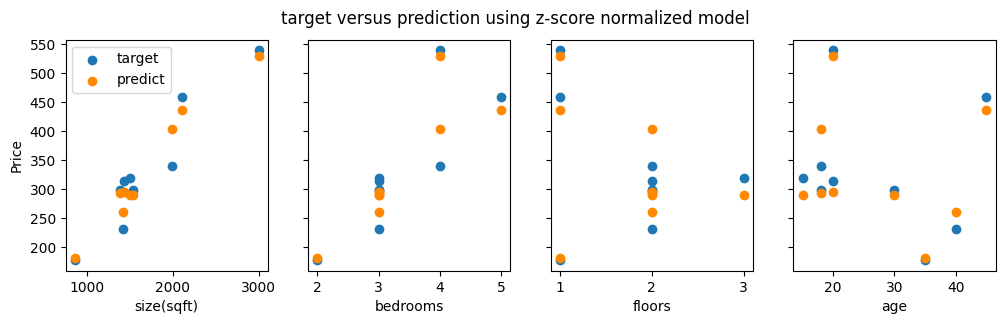

In [9]:
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()